In [1]:
from getdist import plots, loadMCSamples
import numpy as np
import matplotlib.pyplot as plt
import uncertainties

g = plots.get_subplot_plotter(width_inch=30)
g.settings.axes_fontsize=30
g.settings.axes_labelsize=30
g.settings.alpha_filled_add = 0.6
g.settings.legend_fontsize = 30

#SPECIFY DATA DIRECTORY AND DESIRED CHAINS TO ANALYSE
root_dir='/feynman/work/dap/lcs/lg268561/UNIONS/'
roots = ['lensfit_matched','shapepipe_matched']


## Retrieve the chains

In [7]:
#CREATE PARAMNAME FILE


for root in roots:
    chain_dir = '%s/chain' %root
    with open(root_dir + '%s/samples_1.txt'%(chain_dir), "r") as file:
        params = file.readline()[1:].split('\t')[:-2]
        file.close()

    with open(root_dir + '%s/getdist_%s_.paramnames'%(chain_dir,root), "w") as file:
        for i in range(len(params)):
            file.write(params[i].split('--')[1] + '\n')
        file.close()
    print(params)

['cosmological_parameters--omega_m', 'cosmological_parameters--a_s', 'COSMOLOGICAL_PARAMETERS--OMEGA_LAMBDA', 'COSMOLOGICAL_PARAMETERS--SIGMA_8']
['cosmological_parameters--omega_m', 'cosmological_parameters--a_s', 'COSMOLOGICAL_PARAMETERS--OMEGA_LAMBDA', 'COSMOLOGICAL_PARAMETERS--SIGMA_8']


In [2]:
#READ CHAIN

chains=[]

for root in roots:
    chain_dir = '%s/chain' %root
    chain = np.loadtxt(root_dir + '%s/samples_1.txt'%(chain_dir))

    np.savetxt(root_dir + '%s/getdist_%s__1.txt'%(chain_dir,root),  
               np.column_stack((np.ones_like(chain[:, -1]) ,-(chain[:, -1]-chain[:, -2]), chain[:, 0:-2])))
            #    ,chain[:,3]*np.sqrt(chain[:,0]/0.3)

    chain = g.samples_for_root(root_dir + '%s/getdist_%s_' %(chain_dir,root),
                                   settings={'ignore_rows':0.1,'smooth_scale_2D':0.9})
    p=chain.getParams()
    chain.addDerived(np.log(p.a_s*10**10), name='ln10^10A_s', label=r'ln(10^{10}A_s)')
    chain.addDerived(p.SIGMA_8*np.sqrt(p.omega_m/0.3), name='S_8', label=r'S_8')
    
    chains.append(chain)

/feynman/work/dap/lcs/lg268561/UNIONS/lensfit_matched/chain/getdist_lensfit_matched__1.txt
Removed 0.1 as burn in
/feynman/work/dap/lcs/lg268561/UNIONS/shapepipe_matched/chain/getdist_shapepipe_matched__1.txt
Removed 0.1 as burn in


## Plot the chain

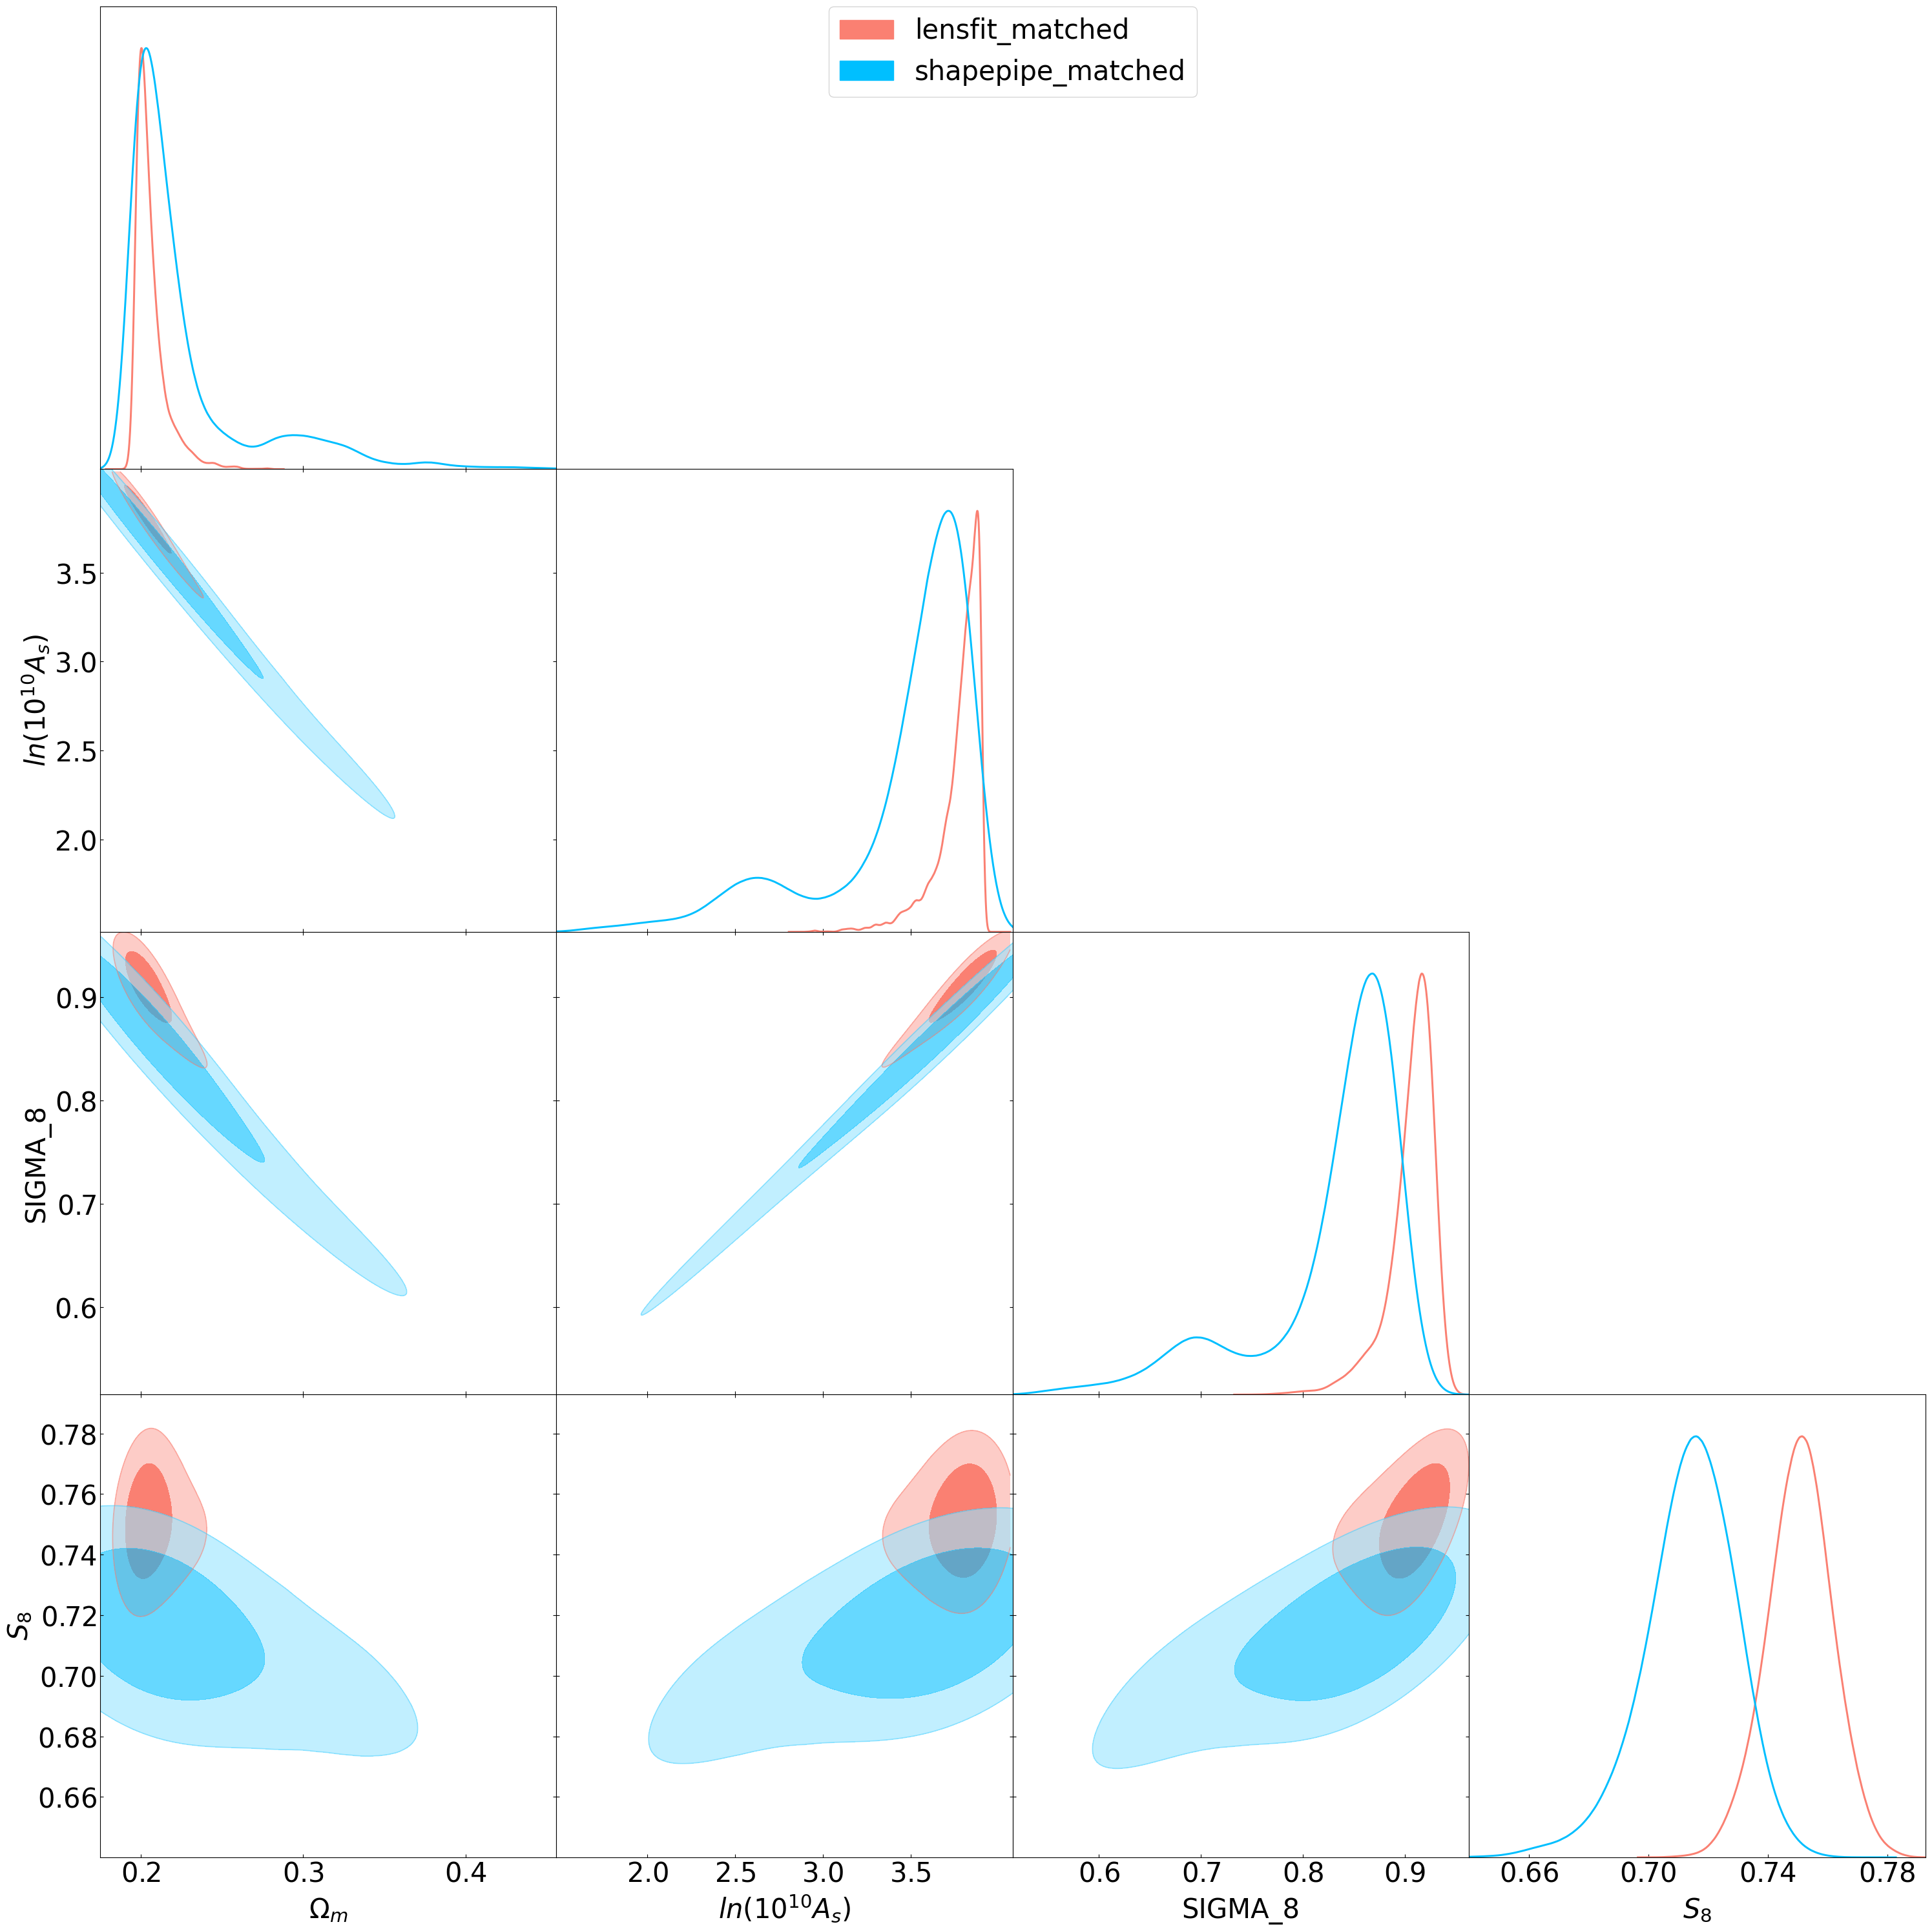

In [4]:
%matplotlib inline
g.triangle_plot(chains,['omega_m','ln10^10A_s','SIGMA_8','S_8'],
                legend_labels=roots,
                # param_limits={'omega_m':[0.15,0.63],'SIGMA_8':[0.4,1],'S_8':[0.4,1],'ln10^10A_s':[1,4]},
                # param_limits={'omega_m':[0.15,0.3],'SIGMA_8':[0.7,1],'S_8':[0.7,1],'ln10^10A_s':[2.5,4]},
                # title_limit=1,
                # markers={'SIGMA_8':0.8,'omega_m':0.25,'OMEGA_LAMBDA':0.75,'S_8':0.7303},
                colors=['salmon','deepskyblue','green','salmon','deepskyblue','green'],
                line_args=[{'color':'salmon'},{'color':'deepskyblue'},{'color':'green'},
                            {'color':'salmon','ls':'--'},{'color':'deepskyblue','ls':'--'},{'color':'green','ls':'--'}],
                filled=[True,True,True,False,False,False])

g.export('plots/corner_plot_comparison.pdf')

### Output bestfit and sigma values

In [10]:
#########BESTFIT AND SIGMA VALS##########
params = ['omega_m','ln10^10A_s','OMEGA_LAMBDA','SIGMA_8','S_8']
latex_params = [r'$\Omega_m$',r'$\ln(10^{10}A_s)$',r'$\Omega_\Lambda$',r'$\sigma_8$',
               r'$S_8$']
    
chain_options=chains

for chain in chain_options:

    margestats = chain.getMargeStats()
    likestats = chain.getLikeStats()

    for no in range(len(latex_params)):
        param_stats = margestats.parWithName(params[no])
        like_stats = likestats.parWithName(params[no])
        
        a = uncertainties.ufloat(param_stats.mean,((param_stats.mean-param_stats.limits[0].lower)+(param_stats.limits[0].upper-param_stats.mean))/2)
        latex_params[no] += '& $%.4g$ & '%(like_stats.bestfit_sample)
        latex_params[no] += '${:.3uL}$'.format(a)
        
for param in latex_params:
    param += r'\\'
    print(param)   


$\Omega_m$& $0.1975$ & $0.2214 \pm 0.0155$& $0.2012$ & $0.2238 \pm 0.0148$& $0.1941$ & $0.2237 \pm 0.0197$& $0.1907$ & $0.2133 \pm 0.0157$& $0.1939$ & $0.2219 \pm 0.0188$& $0.1873$ & $0.2136 \pm 0.0167$\\
$\ln(10^{10}A_s)$& $3.908$ & $3.594 \pm 0.206$& $3.911$ & $3.616 \pm 0.191$& $3.911$ & $3.517 \pm 0.264$& $3.908$ & $3.591 \pm 0.217$& $3.91$ & $3.535 \pm 0.253$& $3.909$ & $3.547 \pm 0.234$\\
$\Omega_\Lambda$& $0.8025$ & $0.7786 \pm 0.0155$& $0.7988$ & $0.7762 \pm 0.0148$& $0.8059$ & $0.7763 \pm 0.0197$& $0.8093$ & $0.7867 \pm 0.0157$& $0.8061$ & $0.7781 \pm 0.0188$& $0.8127$ & $0.7864 \pm 0.0167$\\
$\sigma_8$& $0.9313$ & $0.8785 \pm 0.0371$& $0.9492$ & $0.8973 \pm 0.0355$& $0.917$ & $0.8523 \pm 0.0446$& $0.9001$ & $0.8493 \pm 0.0366$& $0.9157$ & $0.8547 \pm 0.0426$& $0.885$ & $0.8291 \pm 0.0391$\\
$S_8$& $0.7556$ & $0.75149 \pm 0.00959$& $0.7774$ & $0.77211 \pm 0.00960$& $0.7377$ & $0.73239 \pm 0.00964$& $0.7177$ & $0.7137 \pm 0.0102$& $0.7362$ & $0.7320 \pm 0.0108$& $0.6992$ & $0.6